In [18]:
import numpy as np
import math
import pandas as pd

# euler

In [19]:
h = 0.1
x = np.arange(0, 1.1, h)
y = np.zeros(len(x))

y[0] = 0

def f(x, y):
    return (y + x) ** 2

for i in range(1, len(x)):
    y_prev = y[i - 1]
    y_ = y_prev + h * f(x[i - 1], y_prev)
    y[i] = y_

data = {"x": x, "y": y}
euler = pd.DataFrame(data)
euler

,x,y
0,0.0,0.000000
1,0.1,0.000000
2,0.2,0.001000
3,0.3,0.005040
4,0.4,0.014345
5,0.5,0.031513
6,0.6,0.059764
7,0.7,0.103293
8,0.8,0.167821
9,0.9,0.261488


# euler-cauchy

In [20]:
h = 0.1
x = np.arange(0, 1.1, h)
y = np.zeros(len(x))

y[0] = 0

def f(x, y):
    return (y + x) ** 2

for i in range(1, len(x)):
    y_prev = y[i - 1]
    y_1 = y_prev + h * f(x[i - 1], y_prev)
    y[i] = y_prev + h * (f(x[i - 1], y_prev) + f(x[i], y_1)) / 2

data = {"x": x, "y": y}
euler_cauchy = pd.DataFrame(data)
euler_cauchy

,x,y
0,0.0,0.000000
1,0.1,0.000500
2,0.2,0.003035
3,0.3,0.009814
4,0.4,0.023408
5,0.5,0.047024
6,0.6,0.084899
7,0.7,0.142949
8,0.8,0.229887
9,0.9,0.359299


# runge-kutta

In [21]:
h = 0.1
x = np.arange(0, 1.1, h)
y = np.zeros(len(x))

y[0] = 0

def f(x, y):
    return (y + x) ** 2

for i in range(0, len(x) - 1):
    k_1 = h * f(x[i], y[i])
    k_2 = h * f(x[i] + 1/2*h, y[i] + 1/2*k_1)
    k_3 = h * f(x[i] + 1/2*h, y[i] + 1/2*k_2)
    k_4 = h * f(x[i] + h, y[i] + k_3)
    y_delta = 1/6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    y[i + 1] = y[i] + y_delta

data = {"x": x, "y": y}
runge_kutta = pd.DataFrame(data)
runge_kutta

,x,y
0,0.0,0.000000
1,0.1,0.000335
2,0.2,0.002710
3,0.3,0.009336
4,0.4,0.022793
5,0.5,0.046302
6,0.6,0.084137
7,0.7,0.142289
8,0.8,0.229639
9,0.9,0.360159


# adam

In [22]:
h = 0.1
x = np.arange(0, 1.1, h)
y = np.zeros(len(x))

y[0] = 0

def f(x, y):
    return (y + x) ** 2

for i in range(0, 3):
    k_1 = h * f(x[i], y[i])
    k_2 = h * f(x[i] + 1/2*h, y[i] + 1/2*k_1)
    k_3 = h * f(x[i] + 1/2*h, y[i] + 1/2*k_2)
    k_4 = h * f(x[i] + h, y[i] + k_3)
    y_delta = 1/6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    y[i + 1] = y[i] + y_delta

for i in range(4, len(x)):
    y_i = y[i - 1] + h / 24 * (55 * f(x[i - 1], y[i - 1]) - 59 * f(x[i - 2], y[i - 2]) +
                               37 * f(x[i - 3], y[i - 3]) - 9 * f(x[i - 4], y[i - 4]))
    y[i] = y_i
data = {"x": x, "y": y}
adam = pd.DataFrame(data)
adam

,x,y
0,0.0,0.000000
1,0.1,0.000335
2,0.2,0.002710
3,0.3,0.009336
4,0.4,0.022715
5,0.5,0.046098
6,0.6,0.083725
7,0.7,0.141502
8,0.8,0.228134
9,0.9,0.357182


# true

In [23]:
x = np.arange(0, 1.1, h)
y = np.zeros(len(x))

for i in range(0, len(x)):
    y[i] = math.tan(x[i]) - x[i]
data = {"x": x, "y": y}
true = pd.DataFrame(data)
true

,x,y
0,0.0,0.000000
1,0.1,0.000335
2,0.2,0.002710
3,0.3,0.009336
4,0.4,0.022793
5,0.5,0.046302
6,0.6,0.084137
7,0.7,0.142288
8,0.8,0.229639
9,0.9,0.360158


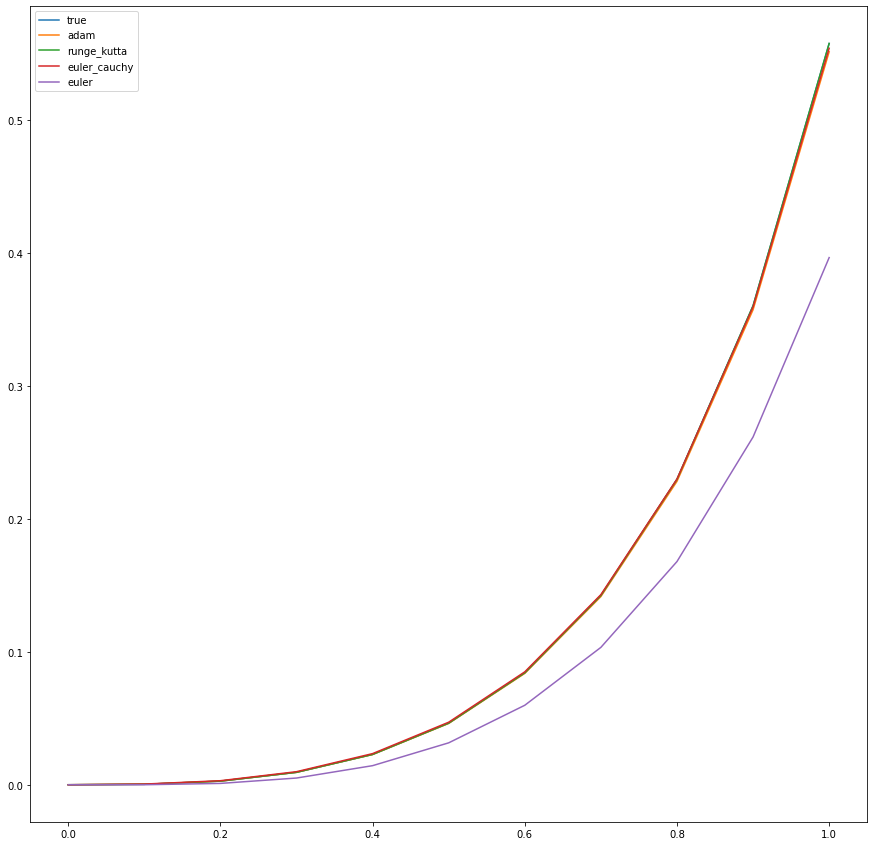

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.plot(true["x"], true["y"], label="true")
plt.plot(adam["x"], adam["y"], label="adam")
plt.plot(runge_kutta["x"], runge_kutta["y"], label="runge_kutta")
plt.plot(euler_cauchy["x"], euler_cauchy["y"], label="euler_cauchy")
plt.plot(euler["x"], euler["y"], label="euler")
plt.legend()
plt.show()